In [1]:
import pandas as pd
import numpy as np


from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    # 중복된 feature 이름 처리: 이름 뒤에 _0, _1, ... 등의 suffix 추가
    feature_dup_df = old_feature_name_df.groupby('column_name').cumcount()
    new_feature_name_df = old_feature_name_df.copy()
    new_feature_name_df['column_name'] = new_feature_name_df['column_name'] + "_" + feature_dup_df.astype(str)
    return new_feature_name_df

def get_human_dataset(base_path='./data/UCI-HAR_Dataset/'):
    # 피처 이름 로딩
    feature_path = base_path + 'features.txt'
    feature_name_df = pd.read_csv(feature_path, sep='\s+', header=None, names=['column_index', 'column_name'])

    # 중복 피처명 처리
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_names = new_feature_name_df['column_name'].tolist()

    # 학습/테스트 데이터 로딩
    X_train = pd.read_csv(base_path + 'train/X_train.txt', sep='\s+', names=feature_names)
    X_test = pd.read_csv(base_path + 'test/X_test.txt', sep='\s+', names=feature_names)

    y_train = pd.read_csv(base_path + 'train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv(base_path + 'test/y_test.txt', sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_26704\1473571509.py:13: SyntaxWarning: invalid escape sequence '\s'
  feature_name_df = pd.read_csv(feature_path, sep='\s+', header=None, names=['column_index', 'column_name'])
C:\Users\user\AppData\Local\Temp\ipykernel_26704\1473571509.py:20: SyntaxWarning: invalid escape sequence '\s'
  X_train = pd.read_csv(base_path + 'train/X_train.txt', sep='\s+', names=feature_names)
C:\Users\user\AppData\Local\Temp\ipykernel_26704\1473571509.py:21: Syn

In [10]:
X_train, X_test, y_train, y_test = get_human_dataset()

print(X_train.shape, X_test.shape)
print(y_train['action'].value_counts())

(7352, 561) (2947, 561)
action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


### 랜덤포레스트 만들기

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.9219545300305395

In [ ]:
#X_train, X_test, y_train,y_test=train_test_split(X_train,y_train,
#                                                 test_size=0.2,
#                                                 random_state=121)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.model_selection import GridSearchCV
rf_clf=RandomForestClassifier(random_state=121) #의사결정나무 분류모델 새로 만듦

#max_depth:트리 최대 깊이, min_samples_split: 노드를 분할하는데 걸린 시간
params= {                    
    'max_depth': [20,32,40],
    'min_samples_split': [2,6]}

#의사결정나무 모델을 다양한 파라미터 조합으로 3번씩 교차검증해
#가장 좋은 조합을 자동으로 찾아주는 도구(GridSearchCV) 객체를 만든다.
grid_dtree=GridSearchCV(rf_clf,param_grid=params, cv=5, refit=True, n_jobs=-1,verbose=2)

#모든 파라미터 조합에 대해 모델을 학습하고, 교차검증으로 최적조합 자동선택
grid_dtree.fit(X_train,y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=121),
             n_jobs=-1,
             param_grid={'max_depth': [20, 32, 40],
                         'min_samples_split': [2, 6]},
             verbose=2)

In [10]:
best_model=grid_dtree.best_estimator_
pred=best_model.predict(X_test)
accuracy_score(y_test,pred)

0.9273837801153716

### 피처 중요도 출력

In [11]:
# 피처 중요도 출력
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model, feature_names, top_n=20):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(10, top_n * 0.4))  # 피처 수에 따라 자동 높이 조절

    plt.barh(range(top_n), importances[indices][::-1], align='center')
    plt.yticks(range(top_n), np.array(feature_names)[indices][::-1])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Feature Importances')
    plt.tight_layout()
    plt.show()

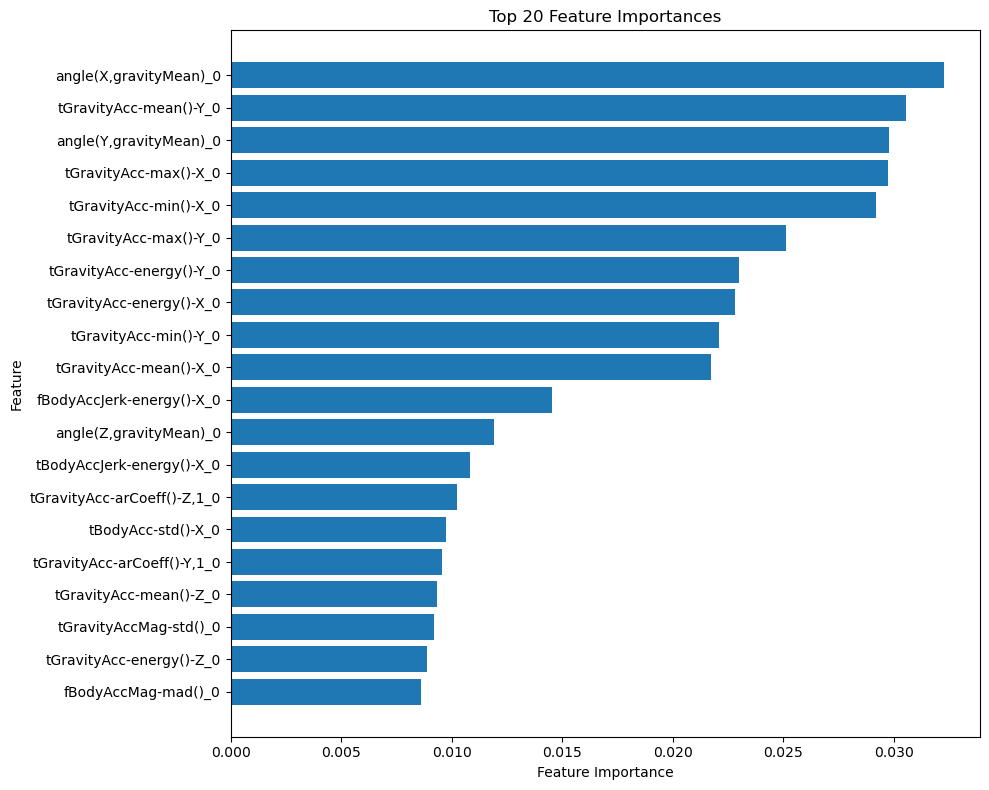

In [12]:
plot_feature_importances(best_model, feature_names=X_train.columns)

In [34]:
cancer=load_breast_cancer()
data_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
#데이터 분할
x_train,X_test,y_train,y_test=train_test_split(cancer.data,
                                               cancer.target,
                                               test_size=0.2,
                                               random_state=0)

In [36]:
# 보팅 분류기 생성
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=7)
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN', knn_clf)],
                          voting='soft')

In [37]:
# 분류기 학습 - 예측 - 평가
vo_clf.fit(x_train,y_train)
vo_pred=vo_clf.predict(X_test)
accuracy_score(y_test,vo_pred)

0.956140350877193

In [38]:
confusion_matrix(y_test,vo_pred)

array([[44,  3],
       [ 2, 65]])

## GBM(Gradient Boosting Macine)

In [12]:
import os
os.chdir('C:/Users/user/.vscode/hipython_rep/')

In [13]:

import re
def clean_feature_name(name):
    # 특수문자 제거: 괄호, 콤마, 하이픈 등
    return re.sub('[^A-Za-z0-9_]+', '_', name)

In [14]:

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    # new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
    #   
    # 중복 이름 처리 + 특수문자 제거
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x: clean_feature_name(x[0] + ('_' + str(x[1]) if x[1] > 0 else '')), axis=1
    )
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [28]:
import os   
os.getcwd()

'C:\\Users\\user\\.vscode\\hipython_rep'

In [15]:
feature_name_df = pd.read_csv('Study/data/UCI-HAR_Dataset/features.txt', sep='\s+' ,
                              header=None, names=['column_index', 'column_name'])

new_feature_name_df = get_new_feature_name_df(feature_name_df)

X_train = pd.read_csv('Study/data/UCI-HAR_Dataset/train/X_train.txt')
X_test =  pd.read_csv('Study/data/UCI-HAR_Dataset/test/X_test.txt')

In [16]:
import pandas as pd

def get_human_dataset( ):
  feature_name_df = pd.read_csv('Study/data/UCI-HAR_Dataset/features.txt',sep='\s+',
                        header=None, names=['column_index','column_name'])
  new_feature_name_df = get_new_feature_name_df(feature_name_df)
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
  X_train = pd.read_csv('Study/data/UCI-HAR_Dataset/train/X_train.txt',sep='\s+', names=feature_name )
  X_test = pd.read_csv('Study/data/UCI-HAR_Dataset/test/X_test.txt',sep='\s+', names=feature_name)
  y_train = pd.read_csv('Study/data/UCI-HAR_Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
  y_test = pd.read_csv('Study/data/UCI-HAR_Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
  
  return X_train, X_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test = get_human_dataset()

print(X_train.shape, X_test.shape)
print(y_train['action'].value_counts())

(7352, 561) (2947, 561)
action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
# X_train, X_test, y_train, y_test = get_human_dataset()

# print(X_train.shape, X_test.shape)
# print(y_train['action'].value_counts())

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
accuracy_score(y_test, gb_pred)

## XGBOOST

In [2]:
import xgboost
print(xgboost.__version__)

3.0.2


In [6]:
from sklearn.preprocessing import LabelEncoder
X_train, X_test, y_train, y_test = get_human_dataset()
X_train.shape, y_train.shape

((7352, 561), (7352, 1))

In [7]:

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Series → 1D array
y_test_encoded = le.transform(y_test)

In [8]:
from xgboost import XGBClassifier
evals = [(X_test, y_test_encoded)]
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, use_label_encoder=False)
xgb.fit(X_train, y_train_encoded, early_stopping_rounds=40, 
        eval_set=evals, eval_metric='mlogloss', verbose=True)
xgb_pred = xgb.predict(X_test)

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [26]:
print(classification_report(y_test_encoded, xgb_pred))

NameError: name 'xgb_pred' is not defined

### LGBM

In [34]:
import lightgbm
print(lightgbm.__version__)

4.6.0


In [35]:

X_train, X_test, y_train, y_test = get_human_dataset()
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Series → 1D array
y_test_encoded = le.transform(y_test)

In [36]:
from lightgbm import LGBMClassifier
evals = [(X_test, y_test_encoded)]
lgb = LGBMClassifier(n_estimators=400, objective='multiclass', 
                     num_class=len(np.unique(y_train_encoded)))
lgb.fit(X_train, y_train_encoded, early_stopping_rounds=40, 
        eval_set=evals, eval_metric='multi_logloss', verbose=True)
lgb_pred = lgb.predict(X_test)

TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:

print(classification_report(y_test_encoded, lgb_pred))